In [1]:
import control 
import numpy as np 
import matplotlib.pyplot as plt
import pyfirmata
import time
import pandas as pd
from scipy.optimize import minimize
import array
from scipy.optimize import fmin_bfgs

In [2]:
df = pd.read_excel('Res_Identification.xlsx',index_col = 0);

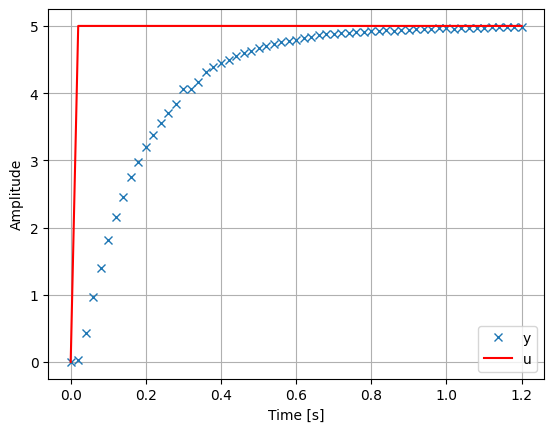

In [3]:
plt.plot(df.Time,df.y,'x',label = 'y')
plt.plot(df.Time,df.u,'r',label = 'u')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [4]:
def myFunction(T):
    dt = df.Time[2] - df.Time[1];
    y = (1-np.exp(-df.Time/T))*df.u;
    return y;

In [5]:
def objective(T):
    ypred = myFunction(T);
    sse = sum((df.y-ypred)**2);
    return sse;

In [6]:
T0 = 2;

# show initial objective
print('Initial SSE Objective: ' + str(objective(T0)))

# optimize Tau
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = \
    fmin_bfgs(objective, 
              T0, 
              maxiter=1000, 
              full_output=True, 
              retall=False,
              )

Initial SSE Objective: 559.26577527525
Optimization terminated successfully.
         Current function value: 0.812707
         Iterations: 5
         Function evaluations: 26
         Gradient evaluations: 13


In [7]:
print('Final SSE Objective: ' + str(objective(xopt)))

print('Value Tau = ' + str(xopt) + 's')

Final SSE Objective: 0.8127072356536343
Value Tau = [0.19767104]s


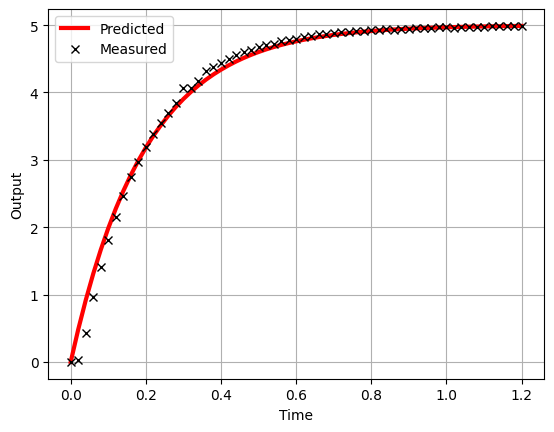

In [8]:
# calculate new ypred
ypred = myFunction(xopt)

# plot results
plt.figure()
plt.plot(df.Time,ypred,'r-',linewidth=3,label='Predicted')
plt.plot(df.Time,df.y,'kx',linewidth=2,label='Measured')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')
plt.grid()
plt.savefig('optimized.png')
plt.show()

In [9]:
# https://apmonitor.com/pdc/index.php/Main/SecondOrderOptimizationFit